<a href="https://colab.research.google.com/github/jdariasl/ML_2020/blob/master/Labs/lab3/lab3_parte2.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almacenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [29]:
#configuración del laboratorio
# Ejecuta esta celda!
#for local 
#import sys ; sys.path.append('../commons/utils/')
!wget https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py -O general.py --no-cache
from general import configure_lab3
configure_lab3()
from lab3 import *
GRADER = part_2()

--2020-10-28 21:22:57--  https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14117 (14K) [text/plain]
Saving to: ‘general.py’

general.py          100%[===================>]  13.79K  --.-KB/s    in 0.01s   

2020-10-28 21:22:57 (1.08 MB/s) - ‘general.py’ saved [14117/14117]

lab configuration started
installing libraries
downloading files
lab configured


# Laboratorio 3 - Parte 2

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasifiación de dígitos escritos a mano, el cual fue abordado en el laboratorio anterior. Usaremos únicamente 4 de las 10 clases disponibles. Los datos fueron preprocesados para reducir el número de características. La técnica usada será analizada más adelante en el curso.

In [30]:
digits = load_digits(n_class=5)
#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
#---------- Datos a usar ----------------------
x = data
y = digits.target

## Ejercicio 1 Experimentos con Arboles de decisión

Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.

En el notebook, ya se encuentra cargada la libreria:

```python
from sklearn.tree import DecisionTreeClassifier
```


In [31]:
#@title Pregunta Abierta
#@markdown  ¿Cuáles criterios para detener el crecimiento del árbol o de los nodos están disponibles en la librería?
respuesta_1 = "Los criterios disponibles en la libreria son profundidad maxima del arbol, el minimo de muestras por hoja, el minimo de muestras para dividir y el minimo de impureza" #@param {type:"string"}

In [32]:
#@title Pregunta Abierta
#@markdown  ¿Cuáles son los parámetros asociados con los criterios enumerados en el punto anterior?
respuesta_2 = "max_depth, min_samples_leaf, min_impurity_decrease, min_samples_split" #@param {type:"string"}

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un arbol de decisión.


<b>Note</b> que existe una clase para modelos de clasificación y otra para modelos de regresión:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Vamos a tener en cuenta lo siguiente:
1. dentro del código, ya se encuentra sugerida la metodologia de validación
2. la función va aceptar un parametro booleano, dependiendo del valor de esta parametro, se ejecutara normalización de los datos.
3. **hacer uso explicito del nombre del parametro que se va usar**, por ejemplo, si se requeire asignar el parametro `criterion`  debemos llamar la libreria de esta manera: `DecisionTreeClassifier(criterion = 'gini')`

In [33]:
#ejercicio de código
def experimentar_dt(depths,normalize, X, Y):
    """funcion que realiza experimentos de arboles de decision
    depths: list[int] lista con la profundidad de arboles a experimentar
    normalize bool: indica si se aplica normalización a los datos
    X: matriz con las caractersiticas
    Y: matriz de numpy con etiquetas
    retorna: dataframe con:
        - profunidad de los arboles
        - eficiencia de entrenamiento
        - desviacion de estandar eficiencia de entrenamiento
        - eficiencia de prueba
        - desviacion estandar eficiencia de prueba
    """
    folds = 4
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for depth in depths:
        ## para almacenar los errores intermedios
        EficienciaTrain = []
        EficienciaVal = []
        for train, test in skf.split(X, Y):
            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]
            #Normalizamos los datos
            # si la bandera esta en True
            if normalize:
                scaler = StandardScaler()
                scaler.fit(Xtrain)
                Xtrain= scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)
            #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
            modelo = DecisionTreeClassifier(max_depth=depth)
            modelo = modelo.fit(Xtrain,Ytrain)
            #predecir muestras de entrenamiento
            Ytrain_pred = modelo.predict(Xtrain)
            #predecir muestras de pruebas
            Yest = modelo.predict(Xtest)
            #Evaluamos las predicciones del modelo con los datos de test
            EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
            EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))

        resultados.loc[idx,'profunidad del arbol'] = depth
        resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
        resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
        resultados.loc[idx,'desviacion estandar prueba'] =  np.mean(EficienciaVal)
        idx= idx +1
        
    return (resultados)

In [34]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio1", experimentar_dt)

TEST EXITOSO!


In [35]:
# Realiza los experimentos sin normalizacion
resultados_dt_no_norm = experimentar_dt([5,10,20,30,50], False, x, y)
resultados_dt_no_norm

,profunidad del arbol,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba
0,5.0,0.969295,0.01381,0.918972,0.918972
1,10.0,1.000000,0.00000,0.926735,0.926735
2,20.0,1.000000,0.00000,0.920064,0.920064
3,30.0,1.000000,0.00000,0.921205,0.921205
4,50.0,1.000000,0.00000,0.912291,0.912291


In [36]:
# Realiza los experimentos con normalizacion
resultados_dt_norm = experimentar_dt([5,10,20,30,50], True, x, y)
resultados_dt_norm

,profunidad del arbol,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba
0,5.0,0.969295,0.01381,0.913432,0.913432
1,10.0,1.000000,0.00000,0.923427,0.923427
2,20.0,1.000000,0.00000,0.922296,0.922296
3,30.0,1.000000,0.00000,0.920079,0.920079
4,50.0,1.000000,0.00000,0.917852,0.917852


In [37]:
#@title Pregunta Abierta
#@markdown  ¿Tiene algún efecto la normalización o estándarización de las variables en el desempeño del modelo de árboles de decisión? Justifique.   
respuesta_3 = "Ninguno, ya que el arbol para tomar desiciones no necesita todo el conjunto de entrenamiento, asi que por este motivo en el caso de existir desbalance no tendria que marcar alguna diferencia." #@param {type:"string"}

## Ejercicio 2 Experimentos con Random Forest

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un Random Forest. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.

En el notebook, ya se encuentra cargada la libreria:

```python
from sklearn.ensemble import RandomForestClassifier

```

<b>Note</b> que al igual que en el caso anterior, existe una clase para modelos de clasificación y otra para modelos de regresión: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

**Recordar hacer uso explicito del nombre del parametro que se va usar**, por ejemplo, si se requeire asignar el parametro `criterion`  debemos llamar la libreria  de esta manera: `RandomForestClassifier(criterion = 'gini')`

In [38]:
#ejercicio de código
def experimentar_rf(num_trees,numero_de_variables, X, Y):
    """funcion que realiza experimentos de random forest
    num_trees: list[int]: lista con el número de arboles usado para el RF
    numero_de_variables list[int]: lista con variables para la selección del mejor umbral en cada nodo 
    X: matriz con las caractersiticas
    Y: matriz de numpy con etiquetas
    retorna: dataframe con:
        -  numero de arboles usados
        -  variables para la selección del mejor umbral
        - eficiencia de entrenamiento
        - desviacion de estandar eficiencia de entrenamiento
        - eficiencia de prueba
        - desviacion estandar eficiencia de prueba
    """
    folds = 4
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for trees in num_trees:
        for num_variables in numero_de_variables:
            ## para almacenar los errores intermedios
            EficienciaTrain = []
            EficienciaVal = []
            for train, test in skf.split(X, Y):
                Xtrain = X[train,:]
                Ytrain = Y[train]
                Xtest = X[test,:]
                Ytest = Y[test]
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                modelo = RandomForestClassifier(  n_estimators=trees  , max_features=num_variables)
                modelo =modelo.fit(Xtrain,Ytrain)
                #predecir muestras de entrenamiento
                Ytrain_pred = modelo.predict(Xtrain)
                #predecir muestras de pruebas
                Yest = modelo.predict(Xtest)
                #Evaluamos las predicciones del modelo con los datos de test
                EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))

            resultados.loc[idx,'número de arboles'] = trees
            resultados.loc[idx,'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
            resultados.loc[idx,'eficiencia de prueba'] =np.mean(EficienciaVal)
            resultados.loc[idx,'desviacion estandar prueba'] =  np.std(EficienciaVal)
            idx= idx +1
        print(f"termina para {trees} arboles")
        
    return (resultados)

In [39]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio2", experimentar_rf)

termina para 3 arboles
termina para 5 arboles
termina para 10 arboles
TEST EXITOSO!


Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [40]:
arboles = [5,10,20,50,100, 150]
variables_seleccion = [5,20,40]
resultados_rf = experimentar_rf(arboles, variables_seleccion, x, y)
resultados_rf

termina para 5 arboles
termina para 10 arboles
termina para 20 arboles
termina para 50 arboles
termina para 100 arboles
termina para 150 arboles


,número de arboles,variables para la selección del mejor umbral,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba
0,5.0,5.0,0.994081,0.004184,0.893461,0.006867
1,5.0,20.0,0.996301,0.003049,0.926735,0.006781
2,5.0,40.0,0.994450,0.001924,0.936740,0.015816
3,10.0,5.0,1.000000,0.000000,0.937886,0.030180
4,10.0,20.0,0.999630,0.000642,0.954474,0.013142
5,10.0,40.0,0.998519,0.001814,0.936735,0.014871
6,20.0,5.0,1.000000,0.000000,0.965585,0.011076
7,20.0,20.0,1.000000,0.000000,0.953378,0.020015
8,20.0,40.0,0.999260,0.000740,0.943387,0.013864
9,50.0,5.0,1.000000,0.000000,0.977793,0.013708


In [41]:
#@title Pregunta Abierta
#@markdown ¿qué caractersitica tiene en especial los Random forest entrenados cuando la cantidad de variables para la selección del mejor umbral es igual a 40?  *desde el punto de vista teorico no de los resultados**
respuesta_3 = "Desde el punto de vista teorico si se utilizan 40 variables estaria muestreando con todas las variables,  asi que dejaria de ser un random forest ya que no estaria realizando submuestreos. " #@param {type:"string"}

Vamos a comparar los resultados del RF y con el DT

In [42]:
print("diferencia promedio entre entrenamiento y prueba del DT", 
      resultados_dt_norm['eficiencia de entrenamiento'].mean()-resultados_dt_norm['eficiencia de prueba'].mean())

print("diferencia promedio entre entrenamiento y prueba del RF", 
      resultados_rf['eficiencia de entrenamiento'].mean()-resultados_rf['eficiencia de prueba'].mean())

diferencia promedio entre entrenamiento y prueba del DT 0.07444206187126567
diferencia promedio entre entrenamiento y prueba del RF 0.04653186267379572


In [43]:
#@title Pregunta Abierta
#@markdown ¿esperaba la diferencia que se observa entre las eficiencias entre entrenamiento y pruebas para el Random forest y el arbol de decisón? justifique 
respuesta_4 = "Si, porque para el problema que se quiere resolver un Random Forest ser\xEDa el mas adecuado, ya que en vez de un solo arbol se est\xE1n utilizando multiples arboles." #@param {type:"string"}

## Ejercicio 3 Experimentos con Gradient Boosted Trees

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un Gradient boosted Tree. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

En el notebook, ya se encuentra cargada la libreria:

```python
from sklearn.ensemble import GradientBoostingClassifier

```

<b>Note</b> que al igual que en el caso anterior, existe una clase para modelos de clasificación y otra para modelos de regresión: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

**Recordar hacer uso explicito del nombre del parametro que se va usar**, por ejemplo, si se requeire asignar el parametro ` loss`  debemos llamar la libreria  de esta manera: `GradientBoostingClassifier(loss = 'deviance')`

In [44]:
#ejercicio de código
def experimentar_gbt(num_trees, X, Y):
    """funcion que realiza experimentos de arboles de decision
    num_trees: list[int] lista con el número de arboles usado para el RF
    X: matriz con las caractersiticas
    Y: matriz de numpy con etiquetas
    retorna: dataframe con:
        - numero de arboles usados
        - eficiencia de entrenamiento
        - desviacion de estandar eficiencia de entrenamiento
        - eficiencia de prueba
        - desviacion estandar eficiencia de prueba
    """
    folds = 4
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for trees in num_trees:
        ## para almacenar los errores intermedios
        EficienciaTrain = []
        EficienciaVal = []
        for train, test in skf.split(X, Y):
            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]
            #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
            modelo= GradientBoostingClassifier(n_estimators= trees)
            modelo =modelo.fit(Xtrain,Ytrain)
            #predecir muestras de entrenamiento
            Ytrain_pred =  modelo.predict(Xtrain)
            #predecir muestras de pruebas
            Yest = modelo.predict(Xtest)
            #Evaluamos las predicciones del modelo con los datos de test
            EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
            EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))

        resultados.loc[idx,'número de arboles'] = trees
        resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaVal)
        resultados.loc[idx,'eficiencia de prueba'] =np.mean(EficienciaVal)
        resultados.loc[idx,'desviacion estandar prueba'] = np.std(EficienciaVal)
        idx= idx +1
        
    return (resultados)

In [45]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio3", experimentar_gbt)

TEST EXITOSO!


In [46]:
# ejecuta para realizar los experimentos
arboles = [5,10,20,50,100, 150]
resultados_gbt = experimentar_gbt(arboles, x, y)
resultados_gbt

,número de arboles,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba
0,5.0,0.988161,0.020576,0.925664,0.020576
1,10.0,0.995190,0.018997,0.928992,0.018997
2,20.0,1.000000,0.016785,0.945595,0.016785
3,50.0,1.000000,0.011531,0.958918,0.011531
4,100.0,1.000000,0.004891,0.965585,0.004891
5,150.0,1.000000,0.002257,0.966701,0.002257


Vamos a graficar la eficiencia para el RF y el GBT en función del número de arboles.

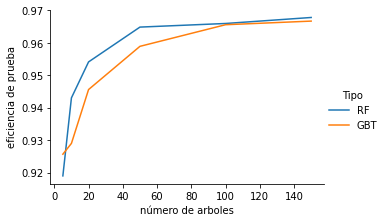

In [47]:
# se crea un df para agrupar los resultados
# y graficar las diferencias entre el GBT y el RF
rf_res = resultados_rf.groupby("número de arboles")['eficiencia de prueba'].mean().reset_index()
rf_res['Tipo'] = 'RF'
gbt_res = resultados_gbt.groupby("número de arboles")['eficiencia de prueba'].mean().reset_index()
gbt_res['Tipo'] = 'GBT'
data_to_plot= pd.concat([rf_res, gbt_res], ignore_index=True)
sns.relplot(data=data_to_plot, x= 'número de arboles', y = 'eficiencia de prueba', hue = 'Tipo', kind='line', aspect=1.5,height=3)

In [48]:
#@title Pregunta Abierta
#@markdown recordando la diferencia entre el Random Forest y el Gradient boosted Trees ¿porqué el GBT necesita más árboles para llegar a mejores eficiencias?
respuesta_5 = "Porque cada nuevo arbol que se genera depende de los resultados anteriores, asi que entre mas arboles existan mas probabilidad existirara a que el GBT corriga los errores de los arboles anteriores, de esta manera mejora la eficiencia" #@param {type:"string"}

## Ejercicio 4 Tiempo de entrenamiento del RF 

En nuestro último experimento, vamos a evaluar la influencia de las parametros del RF en el tiempo de entrenamiento. Para ello vamos a crear una función para medir el tiempo de entrenamiento usando la instrucción `time.clock()`.

Vamos crear la función, para poder evaluar la influencia de:
1. número de arboles
2. cantidad de variables a analizar por nodo

En el entrenamiento del RF. 

**Notar**  
1. No vamos a dividir el conjunto, ya que el objetivo es evaluar el tiempo de entrenamiento y no la eficiencias del modelo
2. No calculamos las prediciones
3. **Recordar hacer uso explicito del nombre del parametro que se va usar**, por ejemplo, si se requeire asignar el parametro `criterion`  debemos llamar la libreria  de esta manera: `RandomForestClassifier(criterion = 'gini')`

In [49]:
def time_rf_training(X, Y, num_trees, numero_de_variables):
    """funcion que realiza experimentos, para determinar la influencia
    del numero de arboles y de caracteristicas en el tiempo de entrenamiento
    del RF
    X: conjunto de datos para realizar los experimentos
    Y: conjunto de etiquetas de clase
    num_trees: List[int] lista con el número de arboles a evaluar
    num_variables: List[int] lista con el número variables a evaluar
    retorna: dataframe con:
    - número de arboles
    - variables para la selección del mejor umbral
    - tiempo de entrenamiento (promedio)
    """
    resultados = pd.DataFrame()
    idx = 0
    
    for trees in num_trees:
        for variables in numero_de_variables:
            ## ejecutar 5 veces lo mismo
            ## para llegar a un tiempo más adecuado
            tiempos = []
            for i in range(5):
            ## llamar la 
                start =time.clock()
                modelo = RandomForestClassifier(  n_estimators=trees  , max_features=variables)
                modelo =modelo.fit(X,Y)
                ## obtener tiempo 
                end = time.clock()
                # append de la resta de fin y end
                tiempos.append(end-start)
            resultados.loc[idx,'número de arboles'] = trees
            resultados.loc[idx,'variables para la selección del mejor umbral'] = variables
            # obtenga el promedio
            resultados.loc[idx,'tiempo de entrenamiento'] = np.mean(tiempos)
            idx = idx +1
    return(resultados)

In [50]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio4", time_rf_training)

TEST EXITOSO!


Vamos a dejar fijo el número de variables en 20 y variar los árboles en: [5,10,15,25, 50], completa el código para ver la grafica

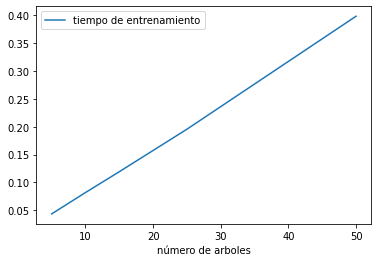

In [51]:
resultados_rf_time1 = time_rf_training(x, y, [5,10,15,25,50], [20])
resultados_rf_time1.plot(x = 'número de arboles', y = 'tiempo de entrenamiento')

Y por ultimo Vamos a dejar fijo el número de árboles en 20 y el número de varaibles [5,10,15,20,40], completa el código para ver la grafica

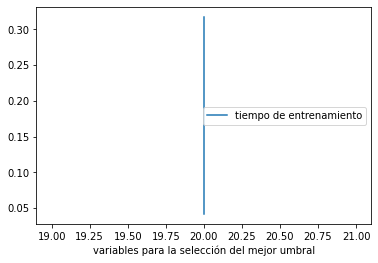

In [52]:
resultados_rf_time2 = time_rf_training(x, y, [5,10,15,20,40], [20])
resultados_rf_time2.plot(x = 'variables para la selección del mejor umbral', y = 'tiempo de entrenamiento')

In [53]:
#@title Pregunta Abierta
#@markdown ¿qué parametro de los evaluados tiene una mayor influencia en los tiempos de entrenamiento? justifique
respuesta_5 = "El numero de arboles, a mas arboles mas aumenta la cantidad de procedimientos durante el entrenamiento  que debe realizar el algoritmo, aumentando el costo computacional" #@param {type:"string"}

In [54]:
#@title Integrantes
codigo_integrante_1 ='1017251689' #@param {type:"string"}
codigo_integrante_2 = ''  #@param {type:"string"}

----
esta linea de codigo va fallar, es de uso exclusivo de los profesores


In [55]:
GRADER.grade()

uso del docente
